                                              Tweets
0  As the new Arthur B. McDonald Chair of Researc...
1  We created GainRank with one thing in mind: ma...
2  RT @acs_short: Journalists during week (?) of ...
3  Although this list is from earlier this year, ...
4  .@Dalplex is encouraging the #DalhousieU commu...
5  T 3500 - एक बात तो तय है  ; इस corona के दौरान...
6  DSU president Aisha went down to the @DSUFoodB...
7  Mata @Amritanandamayi Ji is known for her self...
8  Be it education or community service, the DAV ...
9  Very good. \n\nAlso appreciable to see that th...
Empty DataFrame
Columns: [Tweet, tweets, Match, Polarity]
Index: []
['as the new arthur b mcdonald chair of research excellence dalchemistry prof markstradiotto is developing new ma   p4s9exdwwk']
excellence
{'as': 1, 'the': 1, 'new': 2, 'arthur': 1, 'b': 1, 'mcdonald': 1, 'chair': 1, 'of': 1, 'research': 1, 'excellence': 1, 'dalchemistry': 1, 'prof': 1, 'markstradiotto': 1, 'is': 1, 'developing': 1, 'ma': 1, 'p4s

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Neele\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Neele\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!



['killed', 'ruins']
['excellence', 'good', 'support', 'helping', 'positive', 'good', 'remarkable', 'happy', 'healthy', 'good', 'good', 'support', 'like', 'wow', 'grateful', 'happy', 'hahaha', 'interested', 'help', 'fun', 'thanks', 'important', 'happy', 'hope', 'generous', 'happy', 'peace', 'best', 'noble', 'beautiful', 'won']
['accept', 'wishing', 'free', 'fitness', 'ensure', 'faith', 'safe', 'wishes']
['very inspiring gesture by our former prime minister h_d_devegowda ji indiafightscorona   wzkjjs3sym']
inspiring
{'very': 1, 'inspiring': 1, 'gesture': 1, 'by': 1, 'our': 1, 'former': 1, 'prime': 1, 'minister': 1, 'h_d_devegowda': 1, 'ji': 1, 'indiafightscorona': 1, 'wzkjjs3sym': 1}
['killed', 'ruins']
['excellence', 'good', 'support', 'helping', 'positive', 'good', 'remarkable', 'happy', 'healthy', 'good', 'good', 'support', 'like', 'wow', 'grateful', 'happy', 'hahaha', 'interested', 'help', 'fun', 'thanks', 'important', 'happy', 'hope', 'generous', 'happy', 'peace', 'best', 'noble', 

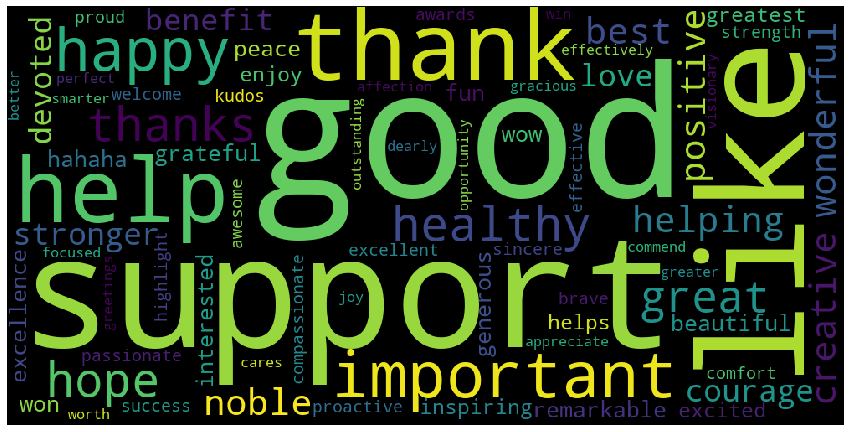

Counter({'killed': 1, 'ruins': 1, 'crisis': 1, 'distressed': 1, 'needy': 1, 'suffering': 1, 'scared': 1, 'poor': 1, 'trouble': 1, 'emergency': 1, 'anguished': 1, 'racism': 1, 'missed': 1, 'misinformation': 1, 'fire': 1})


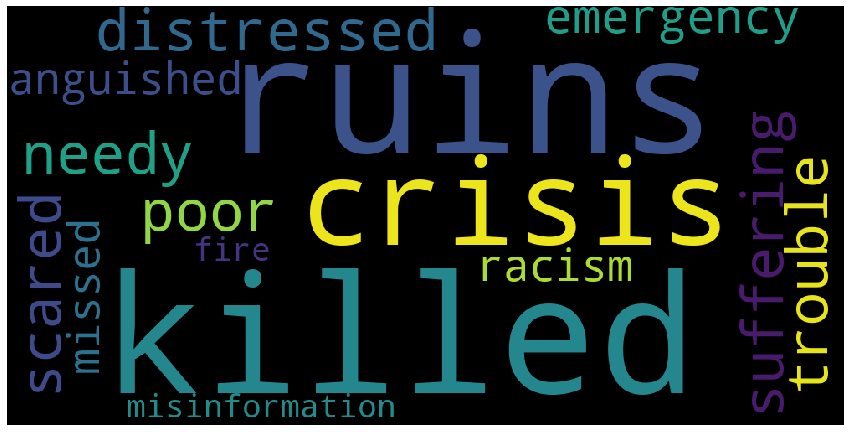

Counter({'safe': 4, 'free': 3, 'ensure': 3, 'feeling': 3, 'wishes': 2, 'protect': 2, 'agree': 2, 'agreed': 2, 'matters': 2, 'accept': 1, 'wishing': 1, 'fitness': 1, 'faith': 1, 'join': 1, 'smart': 1, 'share': 1, 'wish': 1, 'praying': 1, 'please': 1, 'spirit': 1, 'shared': 1, 'big': 1, 'pray': 1})


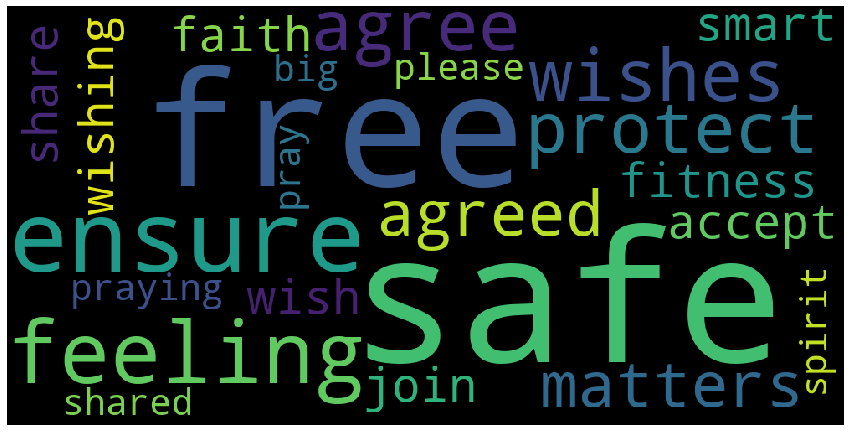

In [248]:
import Credentials
from tweepy import API
import csv
from collections import Counter
from tweepy import Cursor
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
import heapq 
import nltk
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
from sklearn.feature_extraction.text import CountVectorizer
import re
import numpy as np
import pandas as pd

class TwitterAuthenticator():

    def authenticate_twitter_app(self):
        auth=OAuthHandler(Credentials.consumer_key,Credentials.consumer_secret)
        auth.set_access_token(Credentials.access_token,Credentials.access_token_secret)
        return auth

class Streamthetweet():
    def get_tweets(self,savitinfile,list_of_tweets):
        listener=Listenthetweets(saveitinfile)
        stream=Stream(auth,listener)
        stream.filter(track=list_of_tweets)
        
        
class TwitterClient():
    def __init__(self, twitter_user=None):
        self.auth = TwitterAuthenticator().authenticate_twitter_app()
        self.twitter_client = API(self.auth)

        self.twitter_user = twitter_user

    def get_twitter_client_api(self):
        return self.twitter_client

    def get_user_timeline_tweets(self, num_tweets):
        tweets = []
        for tweet in Cursor(self.twitter_client.user_timeline, id=self.twitter_user).items(num_tweets):
            tweets.append(tweet)
        return tweets

    def get_home_timeline_tweets(self, num_tweets):
        home_timeline_tweets = []
        for tweet in Cursor(self.twitter_client.home_timeline, id=self.twitter_user).items(num_tweets):
            home_timeline_tweets.append(tweet)
        return home_timeline_tweets
        
        
class TweetAnalyzer():
    
    def clean_tweet(self, tweet):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
    
    def tweets_to_data_frame(self, tweets):
        df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])
        return df
        
class Listenthetweets(StreamListener):
    def __init__(self, saveitinfile):
        self.saveitinfile = saveitinfile
    def on_data(self,data):
        try:
            print(data)
            
            with open(self.saveitinfile,'w') as tf:
                tf.write(data)
                
            return True
        except BaseException as ee:
            print("error %s" % str(ee))
        return True
    def on_error(self,status):
        print(status)
        
if __name__ == '__main__':
    df2=pd.read_csv(r'G:\DALHOUSIE Term 1\Data management and ware dalhousie\Polarity2.csv')
    positive=df2[df2['Polarity']>=2].Word
    negative=df2[df2['Polarity']<=-2].Word
    neutral=df2[(df2['Polarity']>=1)&(df2['Polarity']>=-1)].Word
    poswords=positive.to_list()
    negwords=negative.to_list()
    neutralwords=neutral.to_list()

    list_of_tweets=["Canada", "University", "Dalhousie University", "Halifax",
"Canada Education"]
    saveitinfile="totalcollectedtweets.csv"
    twitter_client = TwitterClient()
    api = twitter_client.get_twitter_client_api()
    tweets = api.home_timeline(count=3000)
    authenticateit=TwitterAuthenticator()
    authenticateit.authenticate_twitter_app()
    tweet_analyzer = TweetAnalyzer()
    df = tweet_analyzer.tweets_to_data_frame(tweets)
    print(df.head(10))
    dataset=df['Tweets'].to_list()
    
    
    def unique_tweets(tweet_polarity):
        final_tweets = []
        for i in tweet_polarity:
            if i not in final_tweets:
                final_tweets.append(i)
        return final_tweets
    
    
    
    v=CountVectorizer()
    nltk.download('stopwords')
    nltk.download('punkt')
    postweet=[]
    negtweet=[]
    neutratweets=[]
    nosentimenttweet=[]
    final_df=pd.DataFrame(columns=["Tweet","tweets","Match","Polarity"])
    print(final_df.head())
    for i in range(len(dataset[:2000])):
        
        dataset[i] = dataset[i].lower() 
        dataset[i] = re.sub(r'\W', ' ', dataset[i]) 
        dataset[i] = re.sub(r'\s+', ' ', dataset[i])
        dataset[i] = re.sub(r'https\s+', ' ', dataset[i])
        dataset[i] = re.sub(r't co\s+', ' ', dataset[i])
        tweet1=[dataset[i]]
        
        print(tweet1)
    
        bagofwords = {}
        
        for data in tweet1:
            words = nltk.word_tokenize(data)
            for word in words:

                if word not in bagofwords.keys():
                    bagofwords[word] = 1
                else:
                    bagofwords[word] += 1
        
        
        
        for data in tweet1:
            words = nltk.word_tokenize(data)
            for word in words:
                if word in poswords:
                    postweet.append(tweet1)
                    final_df=final_df.append({"Tweet":i+1,"tweets":tweet1,"Match":word,"Polarity":'positive'},ignore_index=True)
                    print(word)
                elif word in negwords:
                    negtweet.append(tweet1)
                    final_df=final_df.append({"Tweet":i+1,"tweets":tweet1,"Match":word,"Polarity":'negative'},ignore_index=True)
                    print(word)
                elif word in neutralwords:
                    neutratweets.append(tweet1)
                    final_df=final_df.append({"Tweet":i+1,"tweets":tweet1,"Match":word,"Polarity":'neutral'},ignore_index=True)
                    print(word)
                
        print(bagofwords)
        
        positive_tweets=unique_tweets(postweet)
        
        negative_tweets=unique_tweets(negtweet)
        neutral_tweets=unique_tweets(neutratweets)
        negative_word_tweets=final_df[final_df['Polarity']=='negative'].Match
        list_of_negativewords=negative_word_tweets.to_list()
        print(list_of_negativewords)
        pos_word_tweets=final_df[final_df['Polarity']=='positive'].Match
        list_of_positivewords=pos_word_tweets.to_list()
        print(list_of_positivewords)
        neutral_word_tweets=final_df[final_df['Polarity']=='neutral'].Match
        list_of_neutralwords=neutral_word_tweets.to_list()
        print(list_of_neutralwords)

    
    word_could_dict=Counter(list_of_positivewords)
    print(word_could_dict)
    wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)
    plt.figure(figsize=(15,20))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
    word_could_dict=Counter(list_of_negativewords)
    print(word_could_dict)
    wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)
    plt.figure(figsize=(15,20))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
    word_could_dict=Counter(list_of_neutralwords)
    print(word_could_dict)
    wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)
    plt.figure(figsize=(15,20))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
    
    
        

        
        
        

        

        
    


        
    
    
    



In [247]:
final_df

,Tweet,tweets,Match,Polarity
0,1,[as the new arthur b mcdonald chair of researc...,excellence,positive
1,4,[although this list is from earlier this year ...,good,positive
2,5,[ dalplex is encouraging the dalhousieu commun...,accept,neutral
3,7,[dsu president aisha went down to the dsufoodb...,support,positive
4,8,[mata amritanandamayi ji is known for her self...,helping,positive
5,9,[be it education or community service the dav ...,positive,positive
6,10,[very good also appreciable to see that the st...,good,positive
7,11,[remarkable gesture wishing you a happy and he...,remarkable,positive
8,11,[remarkable gesture wishing you a happy and he...,wishing,neutral
9,11,[remarkable gesture wishing you a happy and he...,happy,positive


In [255]:
positive_tweets

[['as the new arthur b mcdonald chair of research excellence dalchemistry prof markstradiotto is developing new ma   p4s9exdwwk'],
 ['although this list is from earlier this year we need good books now more than ever thankfully local shops such a   hq8dcszipo'],
 ['dsu president aisha went down to the dsufoodbank last week to show us how it s done if you need food support com   dmrvdxi5zu'],
 ['mata amritanandamayi ji is known for her selfless service and work towards helping the downtrodden she has added   jfj2chlidz'],
 ['be it education or community service the dav family has always had a positive impact in the lives of several peopl   lswaxuhppl'],
 ['very good also appreciable to see that the staff is taking proper precautions this is essential   bdtku1h4jp'],
 ['remarkable gesture wishing you a happy and healthy year ahead   5jpgnfwchv'],
 ['good   aaz27zjpxm'],
 ['had a good discussion on phone today with prime minister nguyen xuan phuc of vietnam about how we can support each  

In [256]:
 neutral_tweets

[[' dalplex is encouraging the dalhousieu community to move more accept the weekly challenge at   hmj9ok5dfr'],
 ['remarkable gesture wishing you a happy and healthy year ahead   5jpgnfwchv'],
 ['do you have a spiritual question contact our chaplains in the multifaith centre it s free and confidential   2gvcd1x9le'],
 ['the link between sports and fitness is well known i m happy to see sportspersons taking the initiative to ensure   ixyl6j7r6v'],
 ['easter reminds us to never lose hope and have faith there will always be light at the end of the tunnel we shall   7kwl8ec841'],
 ['t 3499 a most generous happy and safe easter to all may every festival of every belief bring peace and well b   063v6jwtaz'],
 ['best wishes to everyone on the special occasion of easter we remember the noble thoughts of lord christ especiall   jv6kkgxyh1'],
 [' burnout while not a clinical term is used to describe feeling overwhelmed typically in workplace environments   rwoyvvkrxc'],
 ['join dalmipp for their

In [257]:
negative_tweets

[['i bow to those martyrs who were killed mercilessly in jallianwala bagh on this day we will never forget their cour   rwedj7oqoh'],
 ['days after hurricane dorian left the bahamas in ruins daleng student chaz garraway began working with other bah   hucyabvjnk'],
 ['join dalmipp for their online event leadership in a crisis to hear experienced leaders discuss how public organi   z9epsafbq9'],
 ['my best wishes to apnalayatweets to continue your work in the service of the distressed and needy keep up your go   jx3dkwftmj'],
 ['tracks the spread of covid 19 and notifies you if someone around you is suffering from it also lists help desk nu   lgxykhygrz'],
 ['only feeling scared of covid 19 will not help we have to take the right precautions and fight this pandemic aa   gjgqijjqjp'],
 ['shri tv babu did commendable work at the grassroots level in kerala his efforts to serve the poor and further soci   r2q8tj5fvc'],
 ['rt ksunion having trouble asking profs for the academic accommodations

In [249]:
import json
import requests
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize
import re
import math
 

headers = {'Authorization': '1a144a80798743fb9771c38a2287619d'}
 

top_headlines_url = 'https://newsapi.org/v2/top-headlines'

everything_news_url = 'https://newsapi.org/v2/everything'

sources_url = 'https://newsapi.org/v2/sources'
 
headlines_payload = {'category': 'education', 'country': 'Canada'}
everything_payload = {'q': 'Dalhousie University', 'language': 'en', 'sortBy': 'popularity','pageSize': 100}
sources_payload = {'q': 'Halifax','category': 'general', 'language': 'en', 'country': 'Canada'}
 

response = requests.get(url=everything_news_url, headers=headers, params=everything_payload)
 

pretty_json_output = json.dumps(response.json(), indent=4)
print(pretty_json_output)

 

response_json_string = json.dumps(response.json())
 

response_dict = json.loads(response_json_string)
print(response_dict)
 

articles_list = response_dict['articles']
 

df = pd.read_json(json.dumps(articles_list))
df.to_csv('G:/DALHOUSIE Term 1/Data management and ware dalhousie/newsarticles.csv')
df3=pd.read_csv('G:/DALHOUSIE Term 1/Data management and ware dalhousie/newsarticles.csv')
df3=df3[["title","description","content"]]
listofcontents=df3['content'].to_list()





{
    "status": "ok",
    "totalResults": 173,
    "articles": [
        {
            "source": {
                "id": "techcrunch",
                "name": "TechCrunch"
            },
            "author": "Darrell Etherington",
            "title": "Creative Destruction Lab launches a new startup program dedicated to COVID-19 response",
            "description": "Global academic science and tech startup accelerator program Creative Destruction Lab (CDL) is adding a dedicated stream to its existing areas of focus, which include AI, health sciences, space, quantum computing, blockchain, energy, and oceans. The new addit\u2026",
            "url": "http://techcrunch.com/2020/04/06/creative-destruction-lab-launches-a-new-startup-program-dedicated-to-covid-19-response/",
            "urlToImage": "https://techcrunch.com/wp-content/uploads/2020/03/GettyImages-1208040947.jpg?w=600",
            "publishedAt": "2020-04-06T17:01:09Z",
            "content": "Global academic science and tec

In [250]:
cleanedList = [x for x in listofcontents if str(x) != 'nan']

In [251]:


    

subs="Canada"
subs2="business"
subs3="Dalhousie University"
subs4="University"
subs5="Halifax"
res =[i for i in cleanedList if subs in i]
res2=[j for j in cleanedList if subs2 in j]
res3=[k for k in cleanedList if subs3 in k]
res4=[l for l in cleanedList if subs4 in l]
res5=[m for m in cleanedList if subs5 in m]
final_df2=pd.DataFrame(columns=["Searchquery","noofdocsmatchquery","ratio","Log10(N/df)"])
final_df2=final_df2.append({"Searchquery":'Canada',"noofdocsmatchquery":len(res),"ratio":100/(len(res)),
                            "Log10(N/df)":math.log10(100/len(res))},ignore_index=True)
final_df2=final_df2.append({"Searchquery":'business',"noofdocsmatchquery":len(res2),"ratio":100/(len(res2)),
                            "Log10(N/df)":math.log10(100/len(res2))},ignore_index=True)
final_df2=final_df2.append({"Searchquery":'Dalhousie University',"noofdocsmatchquery":len(res3),"ratio":100/(len(res3)),
                            "Log10(N/df)":math.log10(100/len(res3))},ignore_index=True)
final_df2=final_df2.append({"Searchquery":'University',"noofdocsmatchquery":len(res4),"ratio":100/(len(res4)),
                            "Log10(N/df)":math.log10(100/len(res4))},ignore_index=True)
final_df2=final_df2.append({"Searchquery":'Halifax',"noofdocsmatchquery":len(res5),"ratio":100/(len(res5)),
                            "Log10(N/df)":math.log10(100/len(res5))},ignore_index=True)
print(final_df2.head())

 
        
    

            Searchquery noofdocsmatchquery      ratio  Log10(N/df)
0                Canada                 16   6.250000     0.795880
1              business                  2  50.000000     1.698970
2  Dalhousie University                  9  11.111111     1.045757
3            University                 14   7.142857     0.853872
4               Halifax                  6  16.666667     1.221849


In [162]:
cleanedList

['Global academic science and tech startup accelerator program Creative Destruction Lab (CDL) is adding a dedicated stream to its existing areas of focus, which include AI, health sciences, space, quantum computing, blockchain, energy, and oceans. The new addit… [+2394 chars]',
 '(MENAFN - The Conversation) Dr. Rick leBrasseur is an Associate Professor of Landscape Architecture at Dalhousie University within the Department of Plant, Food and Environmental Sciences.\r\nA licensed landscape architect, environmental psychologist, researche… [+3095 chars]',
 'The Nova Scotia government is making sure tenants impacted by the COVID-19 outbreak cant be evicted, while also committing $1 million to food banks across the province.\r\nThe announcements were made a press briefing in Halifax on Thursday, which was held virtu… [+4043 chars]',
 'We estimated 10 or 11 per cent of the population would panic-buy, and theyre doing that right now but itll soon pass, said Charlebois, senior director of the

In [253]:
final_df6=pd.DataFrame(columns=["articlenumber","totalwords","frequency","articlecontent"])
for z in range(len(cleanedList)):
    substr1="Canada"
    tokens=nltk.word_tokenize(cleanedList[z])
    print(tokens)
    res=[i for i in tokens if substr1 in i]
    print(res)
    print(len(tokens));print(len(res))
    final_df6=final_df6.append({"articlenumber":'Article#'+str(z),"totalwords":len(tokens),
                                "frequency":len(res),"articlecontent":cleanedList[z]},ignore_index=True)
final_df6['relativefrequency']=final_df6['frequency']/final_df6['totalwords']   
final_df7=final_df6[final_df6['frequency']>0]
print(final_df7.loc[final_df7['relativefrequency'].astype(float).idxmax(),'articlecontent'])




['Global', 'academic', 'science', 'and', 'tech', 'startup', 'accelerator', 'program', 'Creative', 'Destruction', 'Lab', '(', 'CDL', ')', 'is', 'adding', 'a', 'dedicated', 'stream', 'to', 'its', 'existing', 'areas', 'of', 'focus', ',', 'which', 'include', 'AI', ',', 'health', 'sciences', ',', 'space', ',', 'quantum', 'computing', ',', 'blockchain', ',', 'energy', ',', 'and', 'oceans', '.', 'The', 'new', 'addit…', '[', '+2394', 'chars', ']']
[]
52
0
['(', 'MENAFN', '-', 'The', 'Conversation', ')', 'Dr.', 'Rick', 'leBrasseur', 'is', 'an', 'Associate', 'Professor', 'of', 'Landscape', 'Architecture', 'at', 'Dalhousie', 'University', 'within', 'the', 'Department', 'of', 'Plant', ',', 'Food', 'and', 'Environmental', 'Sciences', '.', 'A', 'licensed', 'landscape', 'architect', ',', 'environmental', 'psychologist', ',', 'researche…', '[', '+3095', 'chars', ']']
[]
43
0
['The', 'Nova', 'Scotia', 'government', 'is', 'making', 'sure', 'tenants', 'impacted', 'by', 'the', 'COVID-19', 'outbreak', 'can

In [254]:
final_df7

,articlenumber,totalwords,frequency,articlecontent,relativefrequency
10,Article#10,52,1,"WINNIPEG, Manitoba/OTTAWA (Reuters) - After fa...",0.0192308
12,Article#12,46,1,While the coronavirus pandemic has prompted a ...,0.0217391
15,Article#15,49,1,TORONTO Technology companies operating in Cana...,0.0204082
19,Article#19,45,1,A national modelling paper predicting the numb...,0.0222222
43,Article#43,52,1,Politics Insider for March 31: We're tracking ...,0.0192308
51,Article#51,51,1,"March 11, 2020For Immediate Release\r\nMembers...",0.0196078
53,Article#53,53,1,After failing to grow wheat in Canada's subarc...,0.0188679
58,Article#58,49,2,Canada needs to become more secure by becoming...,0.0408163
60,Article#60,50,2,Younger Canadians represent one in three of al...,0.04
64,Article#64,51,1,"A mushroom spray, oil of oregano and a special...",0.0196078
